# Interleaved Randomized Benchmarking (IRB)

In [1]:
%load_ext autoreload
%autoreload 2

## Choose (or define) a backend

In [2]:
#backend = "fakeadonis"
backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

Set IQM Token if using Resonance.

In [3]:
# import os
# os.environ["IQM_TOKEN"] = ""

## Interleaved Randomized Benchmarking Configuration
### 1Q gate IRB

In [4]:
from iqm.benchmarks.randomized_benchmarking.interleaved_rb.interleaved_rb import *
import numpy as np

/opt/anaconda3/envs/env-iqm-benchmarks/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
EXAMPLE_IRB_1Q = InterleavedRBConfiguration(
    qubits_array=[[0]],#,[2],[4],[6]],[8],[10],[12],[14],[16],[17],[19]],
    sequence_lengths=[2**(m+1)-1 for m in range(8)],
    num_circuit_samples=25,
    shots=2**9,
    calset_id=None,
    parallel_execution=True,
    interleaved_gate = "RGate",
    interleaved_gate_params = [np.pi, 0],
    simultaneous_fit = ["amplitude", "offset"],
)

#### Run the experiment - 1Q gate IRB

In [6]:
benchmark_irb_1Q = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_1Q)
run_irb_1Q = benchmark_irb_1Q.run()

2025-02-07 11:28:00,348 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-02-07 11:28:00,605 - iqm.benchmarks.logging_config - INFO - Now executing parallel Interleaved RB on qubits [[0]]. Will generate and submit all 25 Interleaved and Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127, 255].
2025-02-07 11:28:00,605 - iqm.benchmarks.logging_config - INFO - Generating Clifford RB circuits of sequence length 1
2025-02-07 11:28:00,646 - iqm.benchmarks.logging_config - INFO - Generating Interleaved RB circuits of sequence length 1
2025-02-07 11:28:00,668 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [0]
2025-02-07 11:28:00,675 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [0]
2025-02-07 11:28:00,706 - iqm.benchmarks.logging_config - INFO - Both jobs for sequence length 1 submitted successfully!
2025-02-07 11:28:00,907 - iqm.benchmar

#### Analyze the results - 1Q gate IRB

In [7]:
result_irb_1Q = benchmark_irb_1Q.analyze()

2025-02-07 11:28:31,805 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Interleaved RB for qubits [[0]]
2025-02-07 11:28:31,865 - iqm.benchmarks.logging_config - INFO - Metrics for Clifford estimated successfully!
2025-02-07 11:28:31,925 - iqm.benchmarks.logging_config - INFO - Metrics for Interleaved estimated successfully!


In [8]:
result_irb_1Q.observations

[BenchmarkObservation(name='avg_gate_fidelity_interleaved', value=0.9977298173496671, identifier=BenchmarkObservationIdentifier(qubit_indices=[0]), uncertainty=7.756682019399745e-05),
 BenchmarkObservation(name='avg_gate_fidelity_clifford', value=0.9958310487589371, identifier=BenchmarkObservationIdentifier(qubit_indices=[0]), uncertainty=6.64828274034431e-05),
 BenchmarkObservation(name='avg_gate_fidelity_native', value=0.9977765593380998, identifier=BenchmarkObservationIdentifier(qubit_indices=[0]), uncertainty=3.5457500027473125e-05)]

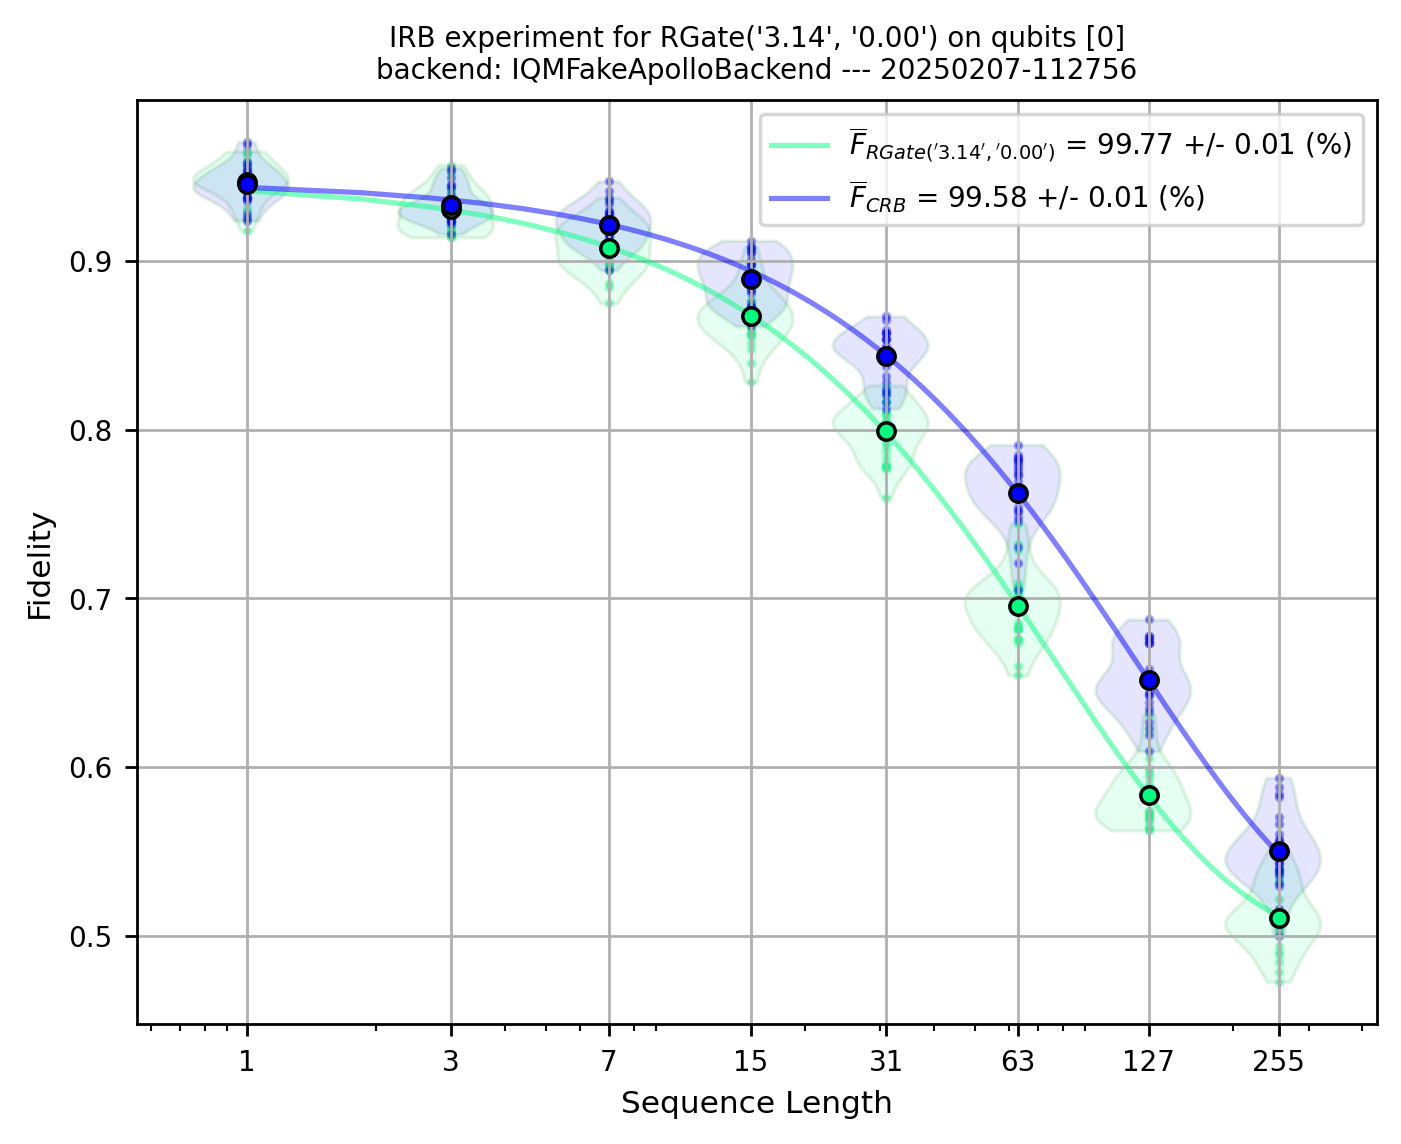

In [9]:
for v in result_irb_1Q.plots.values():
    display(v)

### 2Q gate IRB

In [10]:
EXAMPLE_IRB_2Q = InterleavedRBConfiguration(
    qubits_array=[[0,1]],#,[3,4],[8,9],[13,14],[17,18],[5,6],[10,11],[15,16]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None, # calibration set ID, default is None
    parallel_execution=True, # whether RB is run in parallel - use if you know what you're doing!
    interleaved_gate = "CZGate",
    interleaved_gate_params = None,
    simultaneous_fit = ["amplitude", "offset"],
)

#### Run the experiment - 2Q gate IRB

In [11]:
benchmark_irb_2Q = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_2Q)
run_irb_2Q = benchmark_irb_2Q.run()

2025-02-07 11:28:49,716 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-02-07 11:28:49,718 - iqm.benchmarks.logging_config - INFO - Now executing parallel Interleaved RB on qubits [[0, 1]]. Will generate and submit all 25 Interleaved and Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127].
2025-02-07 11:28:49,718 - iqm.benchmarks.logging_config - INFO - Generating Clifford RB circuits of sequence length 1
2025-02-07 11:28:49,794 - iqm.benchmarks.logging_config - INFO - Generating Interleaved RB circuits of sequence length 1
2025-02-07 11:28:49,875 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [0, 1]
2025-02-07 11:28:49,875 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [0, 1]
2025-02-07 11:28:49,956 - iqm.benchmarks.logging_config - INFO - Both jobs for sequence length 1 submitted successfully!
2025-02-07 11:28:50,138 - iqm.benc

#### Analyze the results - 2Q gate IRB

In [12]:
result_irb_2Q = benchmark_irb_2Q.analyze()

2025-02-07 11:29:41,261 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Interleaved RB for qubits [[0, 1]]
2025-02-07 11:29:41,309 - iqm.benchmarks.logging_config - INFO - Metrics for Clifford estimated successfully!
2025-02-07 11:29:41,356 - iqm.benchmarks.logging_config - INFO - Metrics for Interleaved estimated successfully!


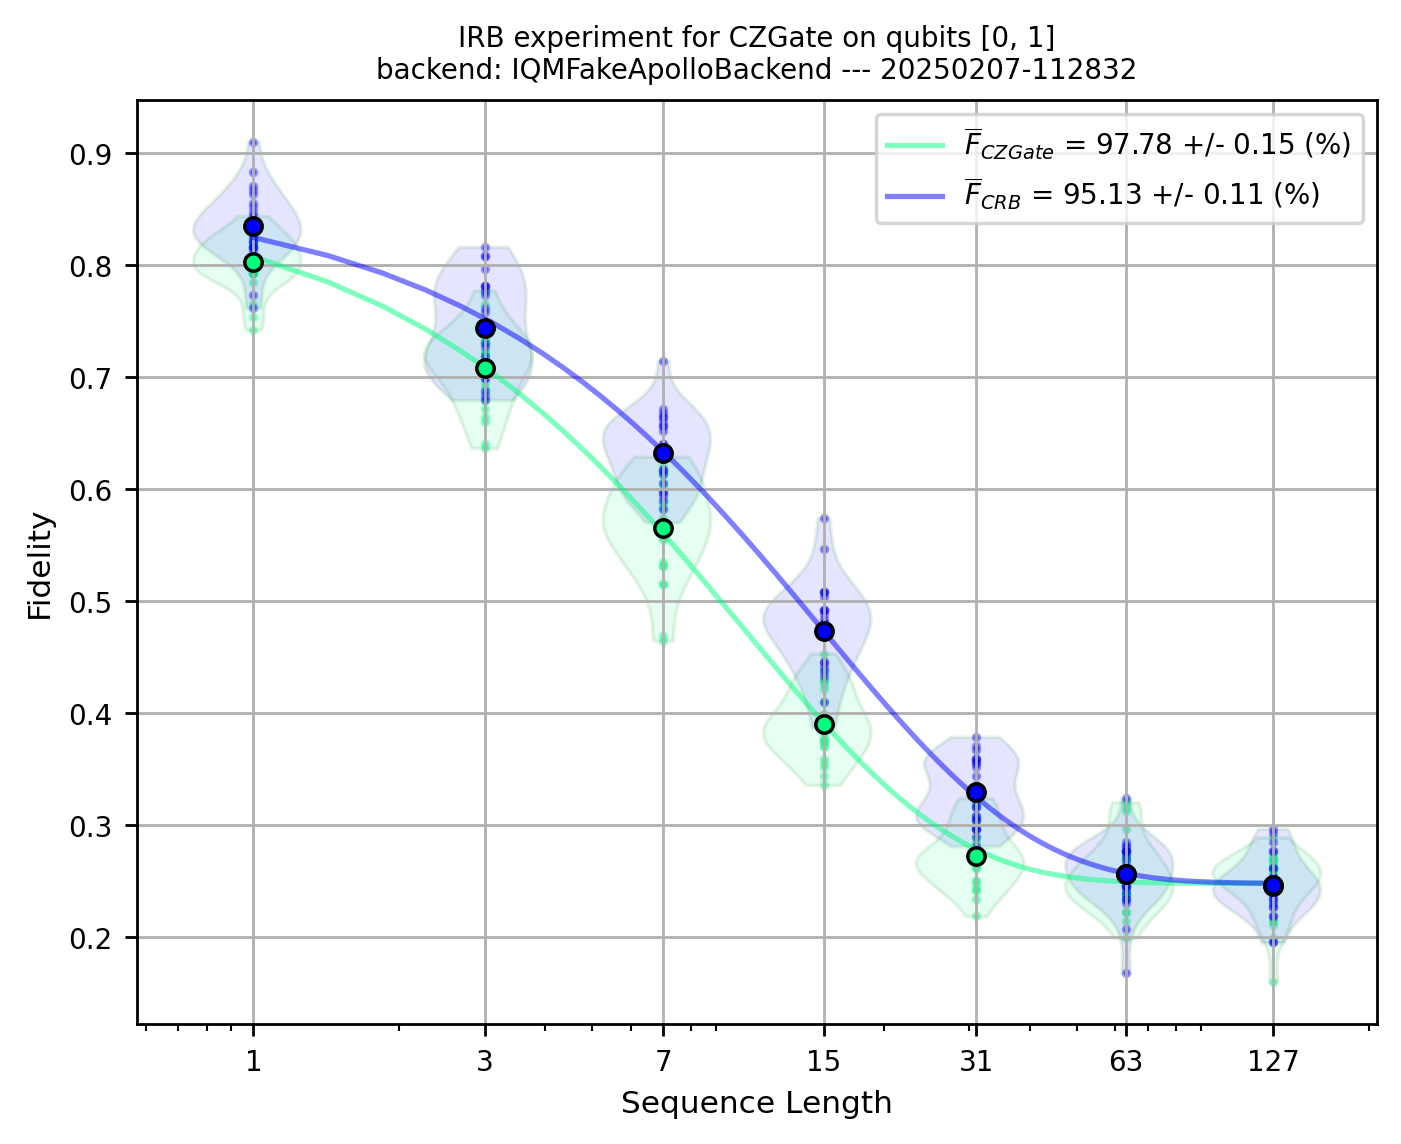

In [13]:
for plot in result_irb_2Q.plots.values():
    display(plot)

## IRB for non-native gate


In [16]:
EXAMPLE_IRB_iswap = InterleavedRBConfiguration(
    qubits_array=[[3,4]],#[8,9]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=30,
    shots=2**10,
    calset_id=None, # calibration set ID, default is None
    parallel_execution=True, # whether RB is run in parallel - use if you know what you're doing!
    interleaved_gate = "iSwapGate",
    interleaved_gate_params = None,
    simultaneous_fit = ["amplitude", "offset"],
)

In [17]:
benchmark_irb_iswap = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_iswap)
run_irb_iswap = benchmark_irb_iswap.run()

2025-02-07 12:25:34,989 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-02-07 12:25:34,996 - iqm.benchmarks.logging_config - INFO - Now executing parallel Interleaved RB on qubits [[3, 4]]. Will generate and submit all 30 Interleaved and Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127].
2025-02-07 12:25:34,997 - iqm.benchmarks.logging_config - INFO - Generating Clifford RB circuits of sequence length 1
2025-02-07 12:25:35,096 - iqm.benchmarks.logging_config - INFO - Generating Interleaved RB circuits of sequence length 1
2025-02-07 12:25:35,225 - iqm.benchmarks.logging_config - INFO - Submitting batch with 30 circuits corresponding to qubits [3, 4]
2025-02-07 12:25:35,226 - iqm.benchmarks.logging_config - INFO - Submitting batch with 30 circuits corresponding to qubits [3, 4]
2025-02-07 12:25:35,283 - iqm.benchmarks.logging_config - INFO - Both jobs for sequence length 1 submitted successfully!
2025-02-07 12:25:35,477 - iqm.benc

In [19]:
result_irb_iswap = benchmark_irb_iswap.analyze()

2025-02-07 12:27:29,998 - iqm.benchmarks.logging_config - INFO - Post-processing parallel Interleaved RB for qubits [[3, 4]]
2025-02-07 12:27:30,067 - iqm.benchmarks.logging_config - INFO - Metrics for Clifford estimated successfully!
2025-02-07 12:27:30,133 - iqm.benchmarks.logging_config - INFO - Metrics for Interleaved estimated successfully!


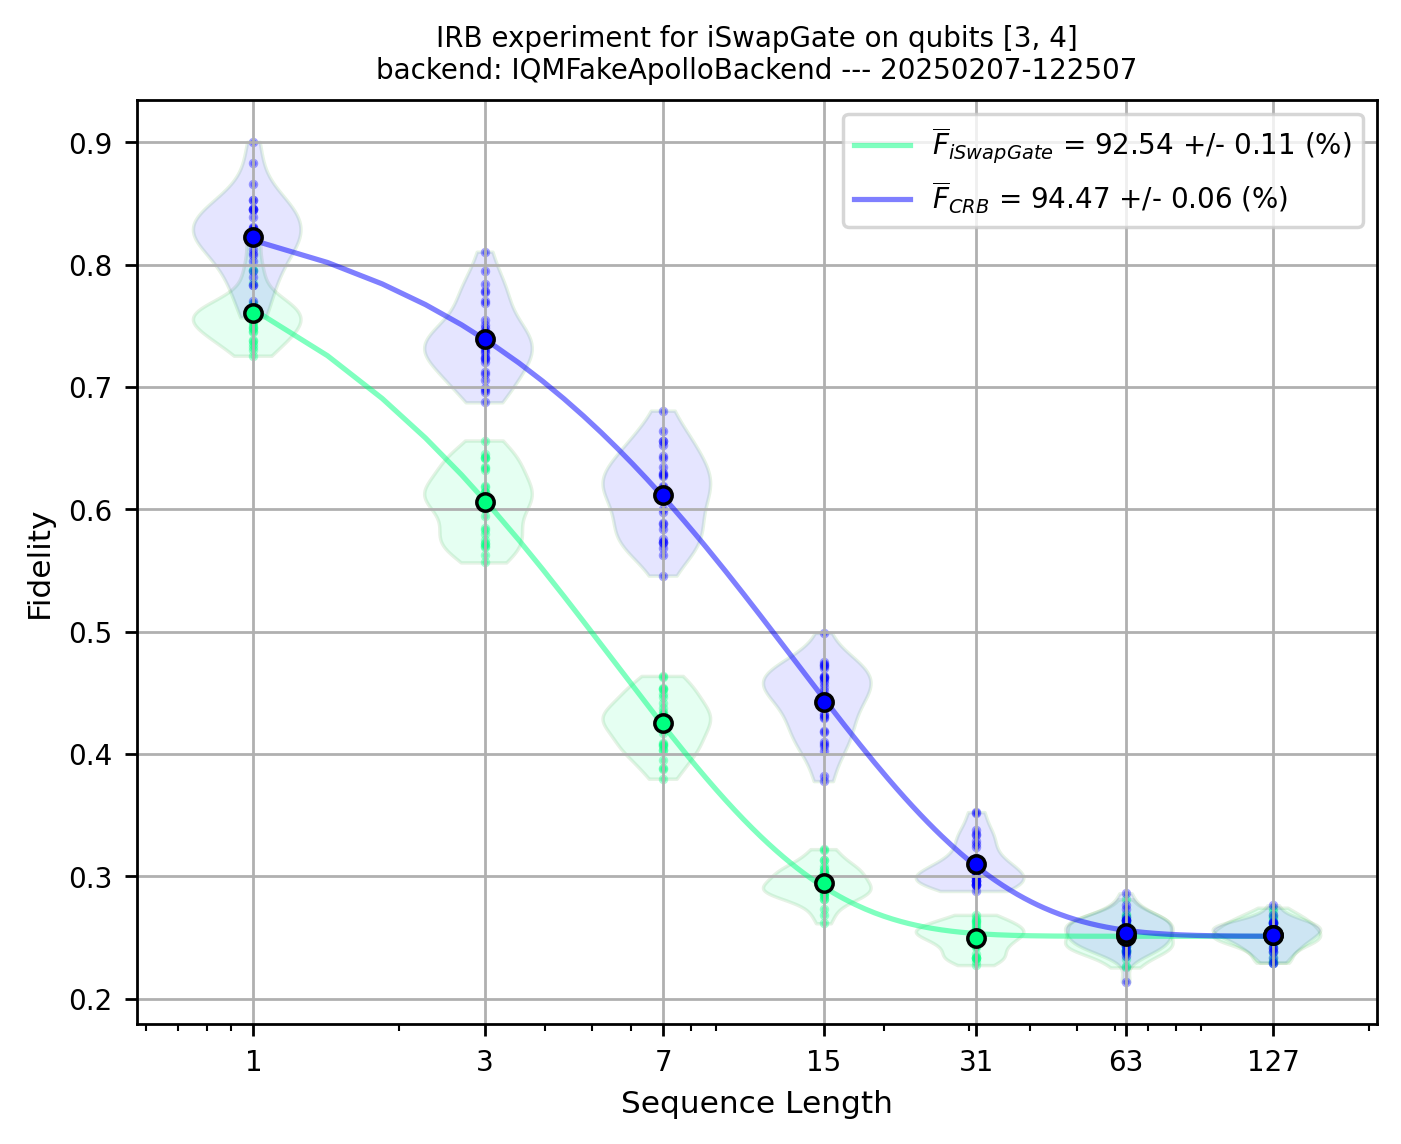

In [20]:
for plot in result_irb_iswap.plots.values():
    display(plot)